In [1]:
import numpy as np
import scipy.signal as signal
from scipy.signal import firwin, lfilter,filtfilt, freqz
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.io.wavfile as wavfile


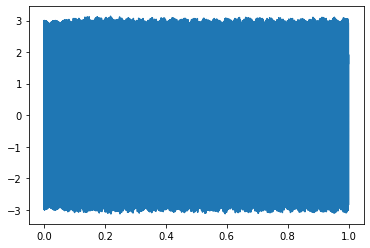

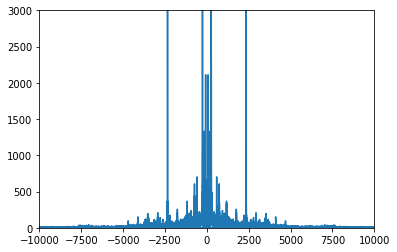

In [9]:
Fe=48000
mean = 0
std = 1 
num_samples = 240000

t = np.linspace(0,1,num_samples)


#x = np.random.normal(mean, std, size=num_samples)
Fe, x = wavfile.read('corrupted_audio.wav')

plt.figure()
plt.plot(t,x)
fft_orig = np.fft.fft(x)
n = fft_orig.size
freq = np.fft.fftfreq(n, d=1/Fe)
plt.figure()
plt.plot(freq, abs(fft_orig))
plt.ylim((0,3000))
plt.xlim((-10000,10000))
ipd.Audio(x, rate=Fe)

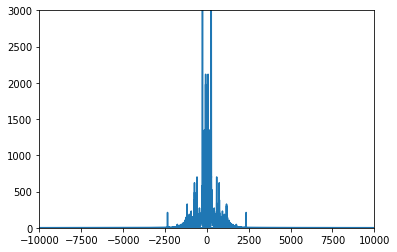

<Figure size 432x288 with 0 Axes>

In [10]:
from scipy.signal import firwin, lfilter,filtfilt
f_c = 1500
taps_lp = firwin(129,2*f_c/Fe)
filtered_signal_1 = lfilter(taps_lp,1,x)

fft_orig = np.fft.fft(filtered_signal_1)
n = fft_orig.size
freq = np.fft.fftfreq(n, d=1/Fe)

plt.plot(freq, abs(fft_orig))
#plt.xticks(np.arange(-24000,24001,8000));
plt.ylim((0,3000))
plt.xlim((-10000,10000))
plt.figure()
#plt.plot(np.arange(0,n/samp_rate, 1/Fe)[0:showing_samples],filtered_signal_1[0:showing_samples]);
ipd.Audio(filtered_signal_1, rate=Fe)

By using a low pass filter, a high-frequiency artefact is removed. Also, high frequency contents of the original signal is lost.

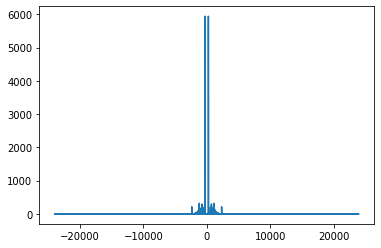

<Figure size 432x288 with 0 Axes>

In [4]:
f_c = 750

taps_hamm = firwin(129,2*f_c/Fe,window='hamming', pass_zero='highpass')
filtered_signal_2 = lfilter(taps_hamm,1,filtered_signal_1)

fft_orig = np.fft.fft(filtered_signal_2)
n = fft_orig.size
freq = np.fft.fftfreq(n, d=1/Fe)

plt.plot(freq, abs(fft_orig))
#plt.xticks(np.arange(-24000,24001,8000));
#plt.ylim((0,4000))
#plt.xlim((-4000,4000))
plt.figure()
#plt.plot(np.arange(0,n/samp_rate, 1/Fe)[0:showing_samples],filtered_signal_1[0:showing_samples]);
ipd.Audio(filtered_signal_2, rate=Fe)

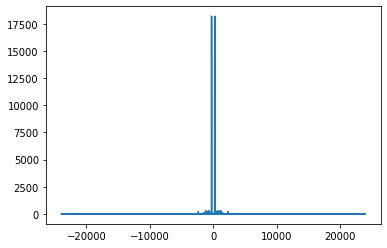

<Figure size 432x288 with 0 Axes>

In [5]:
f_c = 750

taps_black = firwin(129,2*f_c/Fe,window='blackman', pass_zero='highpass')
filtered_signal_2 = lfilter(taps_black,1,filtered_signal_1)

fft_orig = np.fft.fft(filtered_signal_2)
n = fft_orig.size
freq = np.fft.fftfreq(n, d=1/Fe)

plt.plot(freq, abs(fft_orig))
#plt.xticks(np.arange(-24000,24001,8000));
#plt.ylim((0,4000))
#plt.xlim((-4000,4000))
plt.figure()
#plt.plot(np.arange(0,n/samp_rate, 1/Fe)[0:showing_samples],filtered_signal_1[0:showing_samples]);
ipd.Audio(filtered_signal_2, rate=Fe)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\windows\windows.py:1439: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


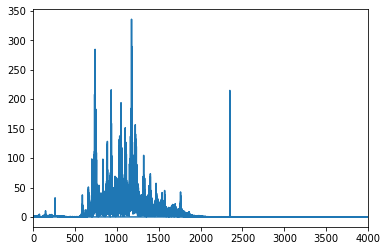

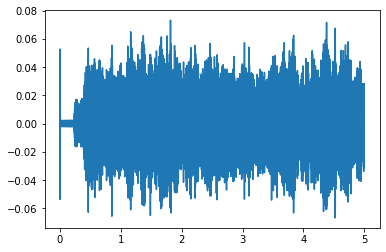

In [23]:
f_c = 750
taps_cheb = firwin(257,2*f_c/Fe,window=('chebwin',30), pass_zero='highpass')
filtered_signal_2 = lfilter(taps_cheb,1,filtered_signal_1)

fft_orig = np.fft.fft(filtered_signal_2)
n = fft_orig.size
freq = np.fft.fftfreq(n, d=1/Fe)

plt.plot(freq, abs(fft_orig))
#plt.xticks(np.arange(-24000,24001,8000));
#plt.ylim((0,4000))
plt.xlim((0,4000))
plt.figure()
showing_samples = 240000
plt.plot(np.arange(0,n/Fe, 1/Fe)[0:showing_samples],filtered_signal_2[0:showing_samples]);
ipd.Audio(filtered_signal_2, rate=Fe)

By hearing the filtered signal (a low pass following by three different high pass filters), it can be understand that the  highpass filter using chebychev window has reached better quality in compare to the other windows (Blackman, Hamming). The FFT of the filtered signal may confoirm the hearing interpretation since the amplitude of the artifact has been attenuated to about 1600 in chebychev window but it is 17,500 and 6000 for Blackman and Hamming windows respectively.

The low-frequency parasit is in the f = 250 Hz. every cut-off frequency of the high pass filter below this frequency puts the parasite in the pass band of the filter. So the cut-off frequency defenitely should be more than 250. By increasing the cut off frequency, the parasite will be more attenuated and at the same time, some parts of the audio signal will be missed. So, the trade off will be between keeping the signal frequency contents and attenuating of the parasite. Moreover, in the previous step, the low pass filter, stop the frequencies more than 1500. Therfore, we should be care about avoiding the signal frequency range be too narrow.  

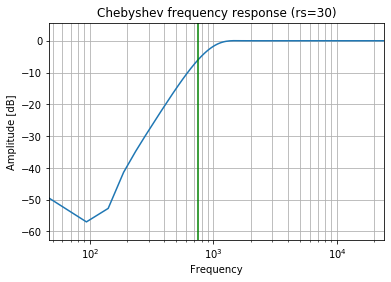

In [14]:

w, h = signal.freqz(taps_hamm)
plt.semilogx(w/np.pi*Fe/2, 20 * np.log10(abs(h)))
plt.title('Chebyshev frequency response (rs=30)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(750, color='green') # cutoff frequency
#plt.axhline(-40, color='green') # rs
plt.show()